# Week 8: Spike timing analysis (??)

Couple sentences describing scientific question/data -- recordings from ?? under ?? conditions. 

Then a couple sentences describing what this notebook is trying to accomplish. Load xx data, perform YY analysis

Data was collected using XX system, which saves traces in .axgt format, which contains tab-delimmited data

Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import scipy.io as sio
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Inspect a single data file

First we want to get a handle on our data files. The `os.walk()` command provides a list of all files contained in dirtory tree.

In [2]:
startpath='Data/'
for root, dirs, files in os.walk(startpath):
    for f in files:
        print(f"{root}/{f}")

Data/MTA/Morphine/01252023_9.axgt
Data/MTA/Morphine/08312023_1.axgt
Data/MTA/Morphine/01252023_4.axgt
Data/MTA/Morphine/02242023_4.axgt
Data/MTA/Morphine/02242023_5.axgt
Data/MTA/Morphine/01252023_1.axgt
Data/MTA/Morphine/08312023_4.axgt
Data/MTA/Morphine/08312023_3.axgt
Data/MTA/Morphine/01252023_7.axgt
Data/MTA/Morphine/02242023_1.axgt
Data/MTA/Morphine/01252023_6.axgt
Data/MTA/Morphine/08312023_2.axgt
Data/MTA/Morphine/08312023_10.axgt
Data/MTA/NLX/01252023_9.axgt
Data/MTA/NLX/01252023_8.axgt
Data/MTA/NLX/02242023_4.axgt
Data/MTA/NLX/01252023_3.axgt
Data/MTA/NLX/08312023_7.axgt
Data/MTA/NLX/08312023_6.axgt
Data/MTA/NLX/01252023_2.axgt
Data/MTA/NLX/02242023_5.axgt
Data/MTA/NLX/08312023_5.axgt
Data/MTA/NLX/01252023_1.axgt
Data/MTA/NLX/08312023_9.axgt
Data/MTA/NLX/08312023_8.axgt
Data/MTA/NLX/01252023_7.axgt
Data/MTA/NLX/02242023_1.axgt
Data/Naive/Morphine/01232023_7.axgt
Data/Naive/Morphine/020262023_7.axgt
Data/Naive/Morphine/07282023_2.axgt
Data/Naive/Morphine/01232023_1.axgt
Data/N

TODO: Explain the file format, how do we know what columns to extract?


In [3]:
example_file='Data/Naive/Morphine/01232023_7.axgt'

Test = np.loadtxt(example_file,skiprows=1, delimiter='\t')

time = Test[:, 0]
depo_pA = Test[:, 4]

depo_pA.shape

(50000,)

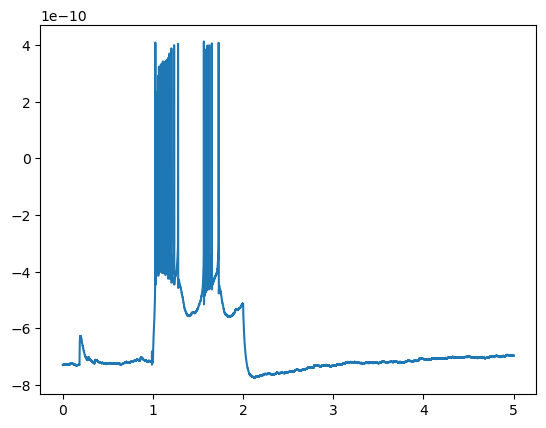

In [4]:
plt.plot(time,depo_pA)

## Take a close look at the trace

Goal is to XX, logic for choosing time window is YY

In [5]:
# Define the time range (between 1 and 2 seconds)
start_time = 1
end_time = 2

# Find the indices within the specified time range
time_indices = np.where((time >= start_time) & (time <= end_time))[0]

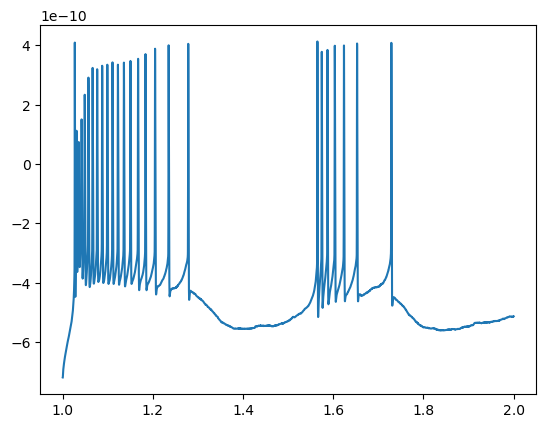

In [6]:
plt.plot(time[time_indices],depo_pA[time_indices])

## Count Spikes

TODO Explain what's happening. 

In [7]:
# Set the threshold
threshold = 0

# Call find_peaks
peaks, _ = find_peaks(depo_pA, height=threshold)

print(peaks)

[10266 10304 10353 10416 10486 10568 10661 10762 10873 10987 11102 11222
 11355 11500 11669 11834 12046 12347 12782 15646 15743 15870 16032 16235
 16526 17286]


To get a better sense of what find_peaks does, we can plot the peaks overlaid on the voltage trace

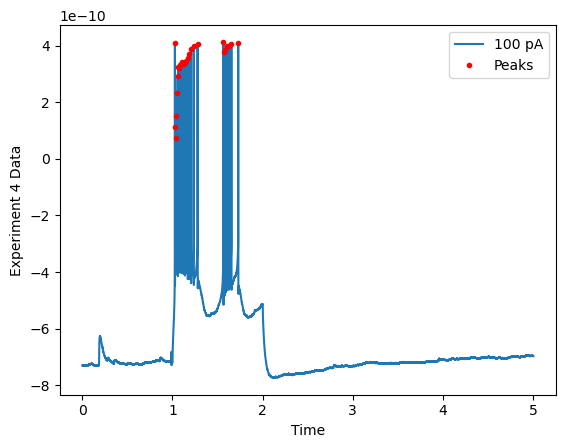

In [8]:
# Plot the data with peaks
plt.plot(time, depo_pA, label='100 pA')
plt.plot(time[peaks], depo_pA[peaks], 'r.', label='Peaks')
plt.xlabel('Time')
plt.ylabel('Experiment 4 Data')
plt.legend()
plt.show()

### Exercise - Zoom in to stimuluation time

Plot the data zoomed in only over the 1-sec stimulation period

(1.0, 2.0)

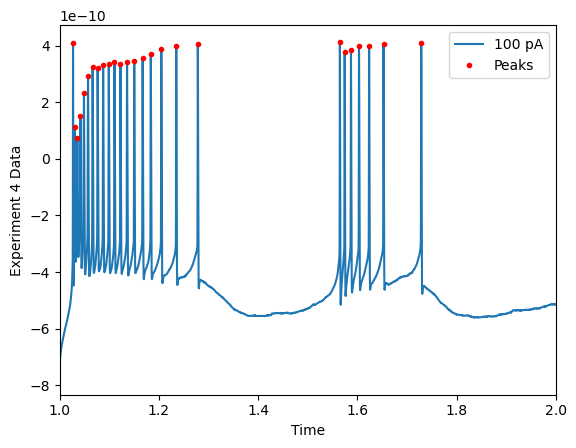

In [9]:
# Answer

# Plot the data with peaks
plt.plot(time, depo_pA, label='100 pA')
plt.plot(time[peaks], depo_pA[peaks], 'r.', label='Peaks')
plt.xlabel('Time')
plt.ylabel('Experiment 4 Data')
plt.legend()
plt.xlim(1,2)

# Inter-spike interval analysis

## Measure ISIs

In [10]:
# figure when spikes happened
spike_times = time[peaks]

# Calculate inter-spike intervals
inter_spike_intervals = np.diff(spike_times)

# Print the result
print(f"Inter-spike intervals: {inter_spike_intervals}")

Inter-spike intervals: [0.0038 0.0049 0.0063 0.007  0.0082 0.0093 0.0101 0.0111 0.0114 0.0115
 0.012  0.0133 0.0145 0.0169 0.0165 0.0212 0.0301 0.0435 0.2864 0.0097
 0.0127 0.0162 0.0203 0.0291 0.076 ]


## Compute interesting statistics

In [11]:
num_spike_events = len(spike_times)

if num_spike_events > 0:
    spike_frequency = num_spike_events / np.sum(inter_spike_intervals)
else:
    spike_frequency = np.nan

onset_time = 1
time_to_last_spike = spike_times.max()-start_time if num_spike_events > 0 else None

print(f"Spike count: {num_spike_events}")
print(f"Frequency: {spike_frequency} spk/sec")
print(f"Time to last spike: {time_to_last_spike} sec")

Spike count: 26
Frequency: 37.03703703703704 spk/sec
Time to last spike: 0.7286999999999999 sec


# Exercise - Function to measure ISIs in one file

Write a function that takes in a file name and uses peak_times to count spikes in the 1-2 sec time window. Return a list of spike times in seconds

```spike_times = get_spike_times(filename)```

In [12]:
# Answer
def get_spike_times(filename, threshold=0, start_time=1, end_time=2):
    
    data = np.loadtxt(filename, skiprows=1, delimiter='\t')
    
    time = data[:, 0]
    depo_pA = data[:, 4]
    
    valid_time = (time>=start_time) & (time<=end_time)
    time = time[valid_time]
    depo_pA = depo_pA[valid_time]
    
    peaks, _ = find_peaks(depo_pA, height=threshold)
    spike_times = time[peaks]
    
    return spike_times

Test it:

In [13]:
f = "Data/Naive/Morphine/01232023_7.axgt"
spike_times = get_spike_times(f)
print(f"Spike times for file {f}: {spike_times}")

Spike times for file Data/Naive/Morphine/01232023_7.axgt: [1.0267 1.0305 1.0354 1.0417 1.0487 1.0569 1.0662 1.0763 1.0874 1.0988
 1.1103 1.1223 1.1356 1.1501 1.167  1.1835 1.2047 1.2348 1.2783 1.5647
 1.5744 1.5871 1.6033 1.6236 1.6527 1.7287]


## Iterate over files



In [14]:
path_parts = example_file.split('/')
f = path_parts[3]
parent = path_parts[2]
grandparent = path_parts[1]
print(f"file: {f}")
print(f"condition (parent folder): {parent}")
print(f"animal group (grandparent folder): {grandparent}")

file: 01232023_7.axgt
condition (parent folder): Morphine
animal group (grandparent folder): Naive


In [15]:
df_files = pd.DataFrame()

startpath='Data/'
counter = 0
for root, dirs, files in os.walk(startpath):
    for f in files:
        if f.endswith('axgt'):
            full_file = root+'/'+f
            path_parts = root.split('/')
            parent = path_parts[2]
            grandparent = path_parts[1]
            df_files.loc[counter,'filepath']=full_file
            df_files.loc[counter,'group']=grandparent
            df_files.loc[counter,'condition']=parent
            df_files.loc[counter,'file']=f
            counter += 1
df_files

,filepath,group,condition,file
0,Data/MTA/Morphine/01252023_9.axgt,MTA,Morphine,01252023_9.axgt
1,Data/MTA/Morphine/08312023_1.axgt,MTA,Morphine,08312023_1.axgt
2,Data/MTA/Morphine/01252023_4.axgt,MTA,Morphine,01252023_4.axgt
3,Data/MTA/Morphine/02242023_4.axgt,MTA,Morphine,02242023_4.axgt
4,Data/MTA/Morphine/02242023_5.axgt,MTA,Morphine,02242023_5.axgt
5,Data/MTA/Morphine/01252023_1.axgt,MTA,Morphine,01252023_1.axgt
6,Data/MTA/Morphine/08312023_4.axgt,MTA,Morphine,08312023_4.axgt
7,Data/MTA/Morphine/08312023_3.axgt,MTA,Morphine,08312023_3.axgt
8,Data/MTA/Morphine/01252023_7.axgt,MTA,Morphine,01252023_7.axgt
9,Data/MTA/Morphine/02242023_1.axgt,MTA,Morphine,02242023_1.axgt


### Exercise - Compute statistics for all files

Write code that iteraties through each row of `df_files`, measures spike times and computes the spikes statistics. Save the spike count, spike frequency and time to last spike in columns `spike_count`, `spike_frequency` and `time_to_last_spike`, respectively. 

In [16]:
for i, r in df_files.iterrows():
    print("Processing:", i, r['filepath'])

    spike_times = get_spike_times(r['filepath'])
    
    inter_spike_intervals = np.diff(spike_times)
    num_spike_events = len(spike_times)
    
    if num_spike_events > 0:
        spike_frequency = num_spike_events / np.sum(inter_spike_intervals)
    else:
        spike_frequency = np.nan
    
    onset_time = 1
    time_to_last_spike = spike_times.max() if num_spike_events > 0 else None

    df_files.loc[i,'spike_count']=num_spike_events
    df_files.loc[i,'spike_frequency']=spike_frequency
    df_files.loc[i,'time_to_last_spike']=time_to_last_spike


Processing: 0 Data/MTA/Morphine/01252023_9.axgt
Processing: 1 Data/MTA/Morphine/08312023_1.axgt
Processing: 2 Data/MTA/Morphine/01252023_4.axgt
Processing: 3 Data/MTA/Morphine/02242023_4.axgt
Processing: 4 Data/MTA/Morphine/02242023_5.axgt
Processing: 5 Data/MTA/Morphine/01252023_1.axgt
Processing: 6 Data/MTA/Morphine/08312023_4.axgt
Processing: 7 Data/MTA/Morphine/08312023_3.axgt
Processing: 8 Data/MTA/Morphine/01252023_7.axgt
Processing: 9 Data/MTA/Morphine/02242023_1.axgt
Processing: 10 Data/MTA/Morphine/01252023_6.axgt
Processing: 11 Data/MTA/Morphine/08312023_2.axgt
Processing: 12 Data/MTA/Morphine/08312023_10.axgt
Processing: 13 Data/MTA/NLX/01252023_9.axgt
Processing: 14 Data/MTA/NLX/01252023_8.axgt
Processing: 15 Data/MTA/NLX/02242023_4.axgt
Processing: 16 Data/MTA/NLX/01252023_3.axgt
Processing: 17 Data/MTA/NLX/08312023_7.axgt
Processing: 18 Data/MTA/NLX/08312023_6.axgt
Processing: 19 Data/MTA/NLX/01252023_2.axgt
Processing: 20 Data/MTA/NLX/02242023_5.axgt
Processing: 21 Data/

In [17]:
df_files

,filepath,group,condition,file,spike_count,spike_frequency,time_to_last_spike
0,Data/MTA/Morphine/01252023_9.axgt,MTA,Morphine,01252023_9.axgt,6.0,53.285968,1.1494
1,Data/MTA/Morphine/08312023_1.axgt,MTA,Morphine,08312023_1.axgt,21.0,73.865635,1.3184
2,Data/MTA/Morphine/01252023_4.axgt,MTA,Morphine,01252023_4.axgt,8.0,29.839612,1.2954
3,Data/MTA/Morphine/02242023_4.axgt,MTA,Morphine,02242023_4.axgt,14.0,61.322821,1.2670
4,Data/MTA/Morphine/02242023_5.axgt,MTA,Morphine,02242023_5.axgt,0.0,NaN,NaN
5,Data/MTA/Morphine/01252023_1.axgt,MTA,Morphine,01252023_1.axgt,17.0,72.094996,1.2868
6,Data/MTA/Morphine/08312023_4.axgt,MTA,Morphine,08312023_4.axgt,7.0,121.739130,1.0892
7,Data/MTA/Morphine/08312023_3.axgt,MTA,Morphine,08312023_3.axgt,10.0,47.415837,1.2361
8,Data/MTA/Morphine/01252023_7.axgt,MTA,Morphine,01252023_7.axgt,7.0,82.352941,1.1158
9,Data/MTA/Morphine/02242023_1.axgt,MTA,Morphine,02242023_1.axgt,5.0,120.772947,1.0696


# Compute group statistics

TODO

In [1]:
#test = sio.loadmat('Naive/07282023 naive/FR  002 Copy_MAT.mat')
#Test = np.loadtxt('Naive/07282023 naive/FR  001 Copy Export.axgt',skiprows=1, delimiter='\t')


#time = Test[:, 0]
#depo_pA = Test[:, 4]

#depo_pA.shape

In [2]:
# Set the threshold
threshold = 0

# Define the time range (between 1 and 2 seconds)
start_time = 1
end_time = 2

# Find the indices within the specified time range
time_indices = np.where((time >= start_time) & (time <= end_time))[0]

NameError: name 'time' is not defined

In [ ]:
# Initialize a counter for the occurrences
occurrences = 0

# Iterate over the indices and count occurrences
in_spike = False
for idx in time_indices:
    if depo_pA[idx] > threshold and not in_spike:
        # Entering a spike event
        in_spike = True
        occurrences += 1
    elif depo_pA[idx] <= threshold and in_spike:
        # Exiting a spike event
        in_spike = False

# Print the result
print(f"Number of spike events between {start_time} and {end_time} seconds: {occurrences}")

In [ ]:
peaks, _ = find_peaks(depo_pA, height=threshold)

# Plot the data with peaks
plt.plot(time, depo_pA, label='100 pA')
plt.plot(time[peaks], depo_pA[peaks], 'r.', label='Peaks')
plt.xlabel('Time')
plt.ylabel('Experiment 4 Data')
plt.legend()
plt.show()

# Calculate inter-spike intervals
inter_spike_intervals = np.diff(time[peaks])

# Print the result
print(f"Inter-spike intervals: {inter_spike_intervals}")

In [ ]:
# Calculate the number of spike events
num_spike_events = len(peaks)

# Calculate spike frequency
spike_frequency = num_spike_events / np.sum(inter_spike_intervals)

print(f"Number of spike events: {num_spike_events}")
print(f"Spike frequency: {spike_frequency} Hz")

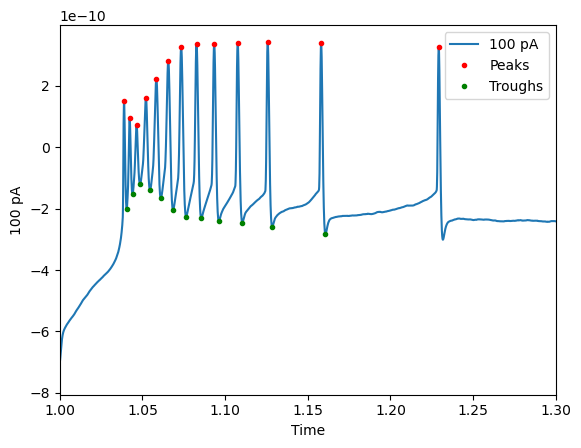

In [6]:
##Troughs##
# Find troughs between peaks
troughs = []
for i in range(len(peaks) - 1):
    trough = np.argmin(depo_pA[peaks[i]:peaks[i+1]]) + peaks[i]
    troughs.append(trough)
troughs = np.array(troughs)

# Plot the data with peaks and troughs
plt.plot(time, depo_pA, label='100 pA')
plt.plot(time[peaks], depo_pA[peaks], 'r.', label='Peaks')
plt.plot(time[troughs], depo_pA[troughs], 'g.', label='Troughs')
plt.xlabel('Time')
plt.ylabel('100 pA')
plt.legend()
plt.xlim(1,1.3)
plt.show()

In [7]:
if len(peaks) > 0:
    # Identify the time of the last spike
    last_spike_time = time[peaks[-1]]

        # Calculate the time it took to go from onset to the last spike
    onset_time = 1
    time_to_last_spike = last_spike_time - onset_time
    print(f"Inactivation at: {time_to_last_spike} seconds")
else:
    print("No spikes detected.")

Inactivation at: 0.22920000000000007 seconds


In [31]:
# Specify the top-level folder path ('Data' folder)
top_folder_path = 'C:/Users/koita/Downloads/FR-Am/FR/Data' 

In [29]:
import os
import numpy as np
from scipy.signal import find_peaks
import pandas as pd

def analyze_data(top_folder_path):
    # Initialize lists to store results
    file_names = []
    parent_folders = []  
    subfolders = []  
    num_spike_events_list = []
    inter_spike_intervals_list = []
    spike_frequency_list = []
    time_to_last_spike_list = []

    count = 0

    # Iterate through all subfolders within the top folder
    for root, dirs, _ in os.walk(top_folder_path):
        # Check if the current subfolder is a 'morphine' or 'NLX' folder
        if os.path.basename(root) in ['Morphine', 'NLX']:
            # Get the parent folder (Naive or MTA)
            parent_folder = os.path.basename(os.path.dirname(root))
            # Get the subfolder (morphine or NLX)
            subfolder = os.path.basename(root)

            # Iterate through all files in the current folder
            for file_name in os.listdir(root):
                if file_name.endswith('.axgt'):
                    # Load data from the file
                    file_path = os.path.join(root, file_name)
                    data = np.loadtxt(file_path, skiprows=1, delimiter='\t')

                    # Extract time and data for analysis
                    time = data[:, 0]
                    experiment_data = data[:, 4]  # Change the column index as needed

                    # Analysis results for: number of spikes/frequency/time to last spike  
                    threshold = 0
                    peaks, _ = find_peaks(experiment_data, height=threshold)

                    num_spike_events = len(peaks)
                    inter_spike_intervals = np.diff(time[peaks])

                    if num_spike_events > 0:
                        spike_frequency = num_spike_events / np.sum(inter_spike_intervals)
                    else:
                        spike_frequency = np.nan

                    onset_time = 1
                    time_to_last_spike = time[peaks[-1]] - onset_time if num_spike_events > 0 else None

                    # Add results to lists
                    file_names.append(file_name)
                    parent_folders.append(parent_folder)  
                    subfolders.append(subfolder)  
                    num_spike_events_list.append(num_spike_events)
                    inter_spike_intervals_list.append(inter_spike_intervals)
                    spike_frequency_list.append(spike_frequency)
                    time_to_last_spike_list.append(time_to_last_spike)

                    count += 1

    # Create a spreadsheet (CSV file) with the results
    output_directory = os.path.join(top_folder_path, 'output')
    os.makedirs(output_directory, exist_ok=True)

    output_file_path = os.path.join(output_directory, 'analysis_results.csv')

    df = pd.DataFrame({
        'File Name': file_names,
        'Parent Folder': parent_folders,  
        'Subfolder': subfolders,  
        'Number of Spike Events': num_spike_events_list,
        'Inter-Spike Intervals': inter_spike_intervals_list,
        'Spike Frequency (Hz)': spike_frequency_list,
        'Time to Last Spike': time_to_last_spike_list
    })

    df.to_csv(output_file_path, index=False)

    print(f"Results saved to {output_file_path}")
    print(f"Number of times the loop ran: {count}")

# The top-level folder path ('Data' folder)
top_folder_path = 'C:/Users/koita/Downloads/FR-Am/FR/Data'  
analyze_data(top_folder_path)


PermissionError: [Errno 13] Permission denied: 'C:/Users/koita/Downloads/FR-Am/FR/Data\\output\\analysis_results.csv'

In [4]:
import os
import numpy as np
import pandas as pd

# Specify the path to the CSV file
csv_path = 'C:/Users/koita/Downloads/FR-Am/FR/Data/output/analysis_results.csv'  

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_path)

# Create masks for each group
naive_morphine_mask = (df['Parent Folder'] == 'Naive') & (df['Subfolder'] == 'morphine')
naive_nlx_mask = (df['Parent Folder'] == 'Naive') & (df['Subfolder'] == 'NLX')
mta_morphine_mask = (df['Parent Folder'] == 'MTA') & (df['Subfolder'] == 'morphine')
mta_nlx_mask = (df['Parent Folder'] == 'MTA') & (df['Subfolder'] == 'NLX')

# Apply masks to create separate DataFrames for each group
naive_morphine_group = df[naive_morphine_mask]
naive_nlx_group = df[naive_nlx_mask]
mta_morphine_group = df[mta_morphine_mask]
mta_nlx_group = df[mta_nlx_mask]

# Display the sorted DataFrames
print("Naive and Morphine Group:")
print(naive_morphine_group)
print("\nNaive and NLX Group:")
print(naive_nlx_group)
print("\nMTA and Morphine Group:")
print(mta_morphine_group)
print("\nMTA and NLX Group:")
print(mta_nlx_group)


Naive and Morphine Group:
Empty DataFrame
Columns: [File Name, Parent Folder, Subfolder, Number of Spike Events, Inter-Spike Intervals, Spike Frequency (Hz), Time to Last Spike]
Index: []

Naive and NLX Group:
            File Name Parent Folder Subfolder  Number of Spike Events  \
39    01232023_1.axgt         Naive       NLX                       0   
40   01232023_10.axgt         Naive       NLX                      17   
41    01232023_2.axgt         Naive       NLX                      14   
42  01232023_3.2.axgt         Naive       NLX                       6   
43    01232023_3.axgt         Naive       NLX                       9   
44   020262023_1.axgt         Naive       NLX                       9   
45   020262023_2.axgt         Naive       NLX                       7   
46   020262023_3.axgt         Naive       NLX                       7   
47   020262023_4.axgt         Naive       NLX                       8   
48   020262023_7.axgt         Naive       NLX               

C:\Users\koita\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\koita\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


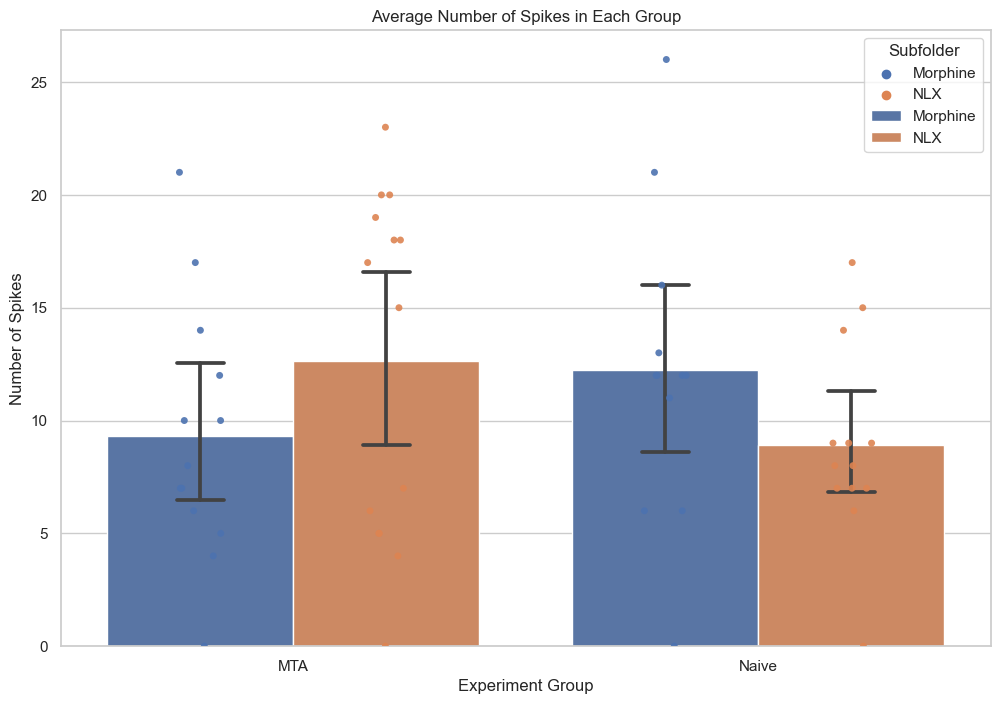

In [18]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# The path to the CSV file
csv_path = 'C:/Users/koita/Downloads/FR-Am/FR/Data/output/analysis_results.csv'  # Update with your actual path

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_path)

# Create masks for each group
naive_morphine_mask = (df['Parent Folder'] == 'Naive') & (df['Subfolder'] == 'morphine')
naive_nlx_mask = (df['Parent Folder'] == 'Naive') & (df['Subfolder'] == 'NLX')
mta_morphine_mask = (df['Parent Folder'] == 'MTA') & (df['Subfolder'] == 'morphine')
mta_nlx_mask = (df['Parent Folder'] == 'MTA') & (df['Subfolder'] == 'NLX')

# Apply masks to create separate DataFrames for each group
naive_morphine_group = df[naive_morphine_mask]
naive_nlx_group = df[naive_nlx_mask]
mta_morphine_group = df[mta_morphine_mask]
mta_nlx_group = df[mta_nlx_mask]

# Plot the average and individual points for each group
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Plot the individual points
sns.stripplot(x='Parent Folder', y='Number of Spike Events', hue='Subfolder', data=df, jitter=True, dodge=True, alpha=0.9)

# Plot the average for each group
sns.barplot(x='Parent Folder', y='Number of Spike Events', hue='Subfolder', data=df, capsize=0.1)

# Set labels and title
plt.xlabel('Experiment Group')
plt.ylabel('Number of Spikes')
plt.title('Average Number of Spikes in Each Group')

# Show the plot
plt.legend(title='Subfolder')
plt.show()


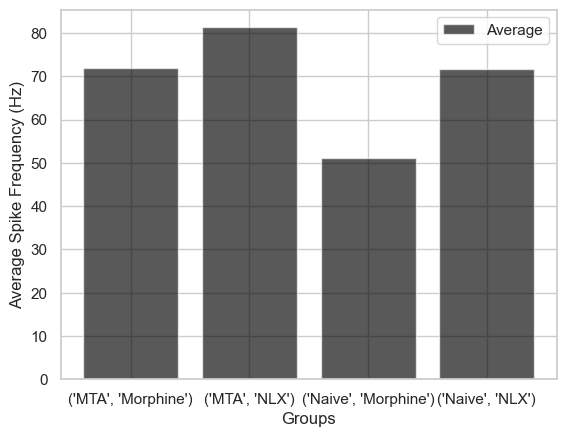

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Group by 'Parent Folder' and 'Subfolder'
grouped_df = df.groupby(['Parent Folder', 'Subfolder'])

# Create a figure and axis
fig, ax = plt.subplots()

# Iterate through groups and plot average spike frequency
for (parent_folder, subfolder), group_df in grouped_df:
    
    # Extract spike frequency from the group
    spike_frequency = group_df['Spike Frequency (Hz)'].values

    
# Plot average spike frequency for each group
average_frequency = grouped_df['Spike Frequency (Hz)'].mean()
ax.bar(np.arange(len(average_frequency)), average_frequency, label='Average', color='black', alpha=0.65)

# Set labels and legend
ax.set_xticks(np.arange(len(average_frequency)))
ax.set_xticklabels(average_frequency.index)
ax.set_xlabel('Groups')
ax.set_ylabel('Average Spike Frequency (Hz)')
ax.legend()
plt.show()


In [8]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('Data/output/analysis_results.csv')

# Assuming 'Inter-Spike Intervals' is a column in your DataFrame
df['Inter-Spike Intervals'] = df['Inter-Spike Intervals'].apply(
    lambda x: np.fromstring(x.strip('[]'), sep=' ').astype(float) if isinstance(x, str) else np.nan
)

# Group by 'Parent Folder' and 'Subfolder'
grouped_df = df.groupby(['Parent Folder', 'Subfolder'])

# Iterate through groups and calculate average of the first ISI
for (parent_folder, subfolder), group_df in grouped_df:
    first_isis = [isi[0] for isi in group_df['Inter-Spike Intervals'] if isinstance(isi, np.ndarray) and len(isi) > 0]
    average_first_isi = np.mean(first_isis)
    
    print(f'{parent_folder} - {subfolder}: Average of the first ISI = {average_first_isi}')


MTA - Morphine: Average of the first ISI = 0.007391666666666667
MTA - NLX: Average of the first ISI = 0.005215384615384616
Naive - Morphine: Average of the first ISI = 0.008454545454545454
Naive - NLX: Average of the first ISI = 0.006391666666666667


In [12]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('Data/output/analysis_results.csv')

# Assuming 'Inter-Spike Intervals' is a column in your DataFrame
df['Inter-Spike Intervals'] = df['Inter-Spike Intervals'].apply(
    lambda x: np.fromstring(x.strip('[]'), sep=' ').astype(float) if isinstance(x, str) else np.nan
)

# Group by 'Parent Folder' and 'Subfolder'
grouped_df = df.groupby(['Parent Folder', 'Subfolder'])

# Iterate through groups and calculate average of each ISI
for (parent_folder, subfolder), group_df in grouped_df:
    max_isi_length = max(len(isi) for isi in group_df['Inter-Spike Intervals'] if isinstance(isi, np.ndarray))
    
    for i in range(max_isi_length):
        isis = [isi[i] for isi in group_df['Inter-Spike Intervals'] if isinstance(isi, np.ndarray) and len(isi) > i]
        average_isi = np.mean(isis)
        
        print(f'{parent_folder} - {subfolder}: Average of ISI-{i+1} = {average_isi}')


MTA - Morphine: Average of ISI-1 = 0.007391666666666667
MTA - Morphine: Average of ISI-2 = 0.008925
MTA - Morphine: Average of ISI-3 = 0.015175000000000001
MTA - Morphine: Average of ISI-4 = 0.011463636363636363
MTA - Morphine: Average of ISI-5 = 0.01775
MTA - Morphine: Average of ISI-6 = 0.020466666666666664
MTA - Morphine: Average of ISI-7 = 0.025128571428571427
MTA - Morphine: Average of ISI-8 = 0.01865
MTA - Morphine: Average of ISI-9 = 0.031400000000000004
MTA - Morphine: Average of ISI-10 = 0.0177
MTA - Morphine: Average of ISI-11 = 0.02
MTA - Morphine: Average of ISI-12 = 0.022866666666666664
MTA - Morphine: Average of ISI-13 = 0.026633333333333332
MTA - Morphine: Average of ISI-14 = 0.0185
MTA - Morphine: Average of ISI-15 = 0.0218
MTA - Morphine: Average of ISI-16 = 0.03195
MTA - Morphine: Average of ISI-17 = 0.0194
MTA - Morphine: Average of ISI-18 = 0.0221
MTA - Morphine: Average of ISI-19 = 0.026
MTA - Morphine: Average of ISI-20 = 0.0553
MTA - NLX: Average of ISI-1 = 0.005

In [27]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('Data/output/analysis_results.csv')

# Assuming 'Inter-Spike Intervals' is a column in your DataFrame
df['Inter-Spike Intervals'] = df['Inter-Spike Intervals'].apply(
    lambda x: np.fromstring(x.strip('[]'), sep=' ').astype(float) if isinstance(x, str) else np.nan
)

# Group by 'Parent Folder' and 'Subfolder'
grouped_df = df.groupby(['Parent Folder', 'Subfolder'])

# Initialize a new DataFrame to store the averages
averages_df = pd.DataFrame()

# Iterate through groups and calculate average of each ISI
for (parent_folder, subfolder), group_df in grouped_df:
    max_isi_length = max(len(isi) for isi in group_df['Inter-Spike Intervals'] if isinstance(isi, np.ndarray))
    
    for i in range(max_isi_length):
        isis = [isi[i] for isi in group_df['Inter-Spike Intervals'] if isinstance(isi, np.ndarray) and len(isi) > i]
        average_isi = np.mean(isis)
        
        # Store the average ISI in the corresponding column
        column_name = f'Group{i+1}'
        averages_df.loc[f'{parent_folder} - {subfolder}', column_name] = average_isi

# Print the resulting DataFrame
print(averages_df)

# Save the DataFrame to a new CSV file
output_file_path = 'averages_output.csv'
averages_df.to_csv(output_file_path)

# Print the location of the output file
print(f'Output file saved to: {output_file_path}')


                    Group1    Group2    Group3    Group4    Group5    Group6  \
MTA - Morphine    0.007392  0.008925  0.015175  0.011464  0.017750  0.020467   
MTA - NLX         0.005215  0.007623  0.010023  0.009967  0.011790  0.012544   
Naive - Morphine  0.008455  0.008218  0.011191  0.015900  0.025691  0.017311   
Naive - NLX       0.006392  0.011283  0.009350  0.012167  0.021150  0.040882   

                    Group7    Group8    Group9   Group10  ...   Group16  \
MTA - Morphine    0.025129  0.018650  0.031400  0.017700  ...  0.031950   
MTA - NLX         0.012462  0.013475  0.014450  0.015562  ...  0.033586   
Naive - Morphine  0.020489  0.023211  0.029433  0.041578  ...  0.022000   
Naive - NLX       0.052375  0.059317  0.025900  0.037833  ...  0.118300   

                  Group17   Group18   Group19  Group20  Group21  Group22  \
MTA - Morphine    0.01940  0.022100  0.026000   0.0553      NaN      NaN   
MTA - NLX         0.03920  0.045975  0.051667   0.1390   0.1135   0.121

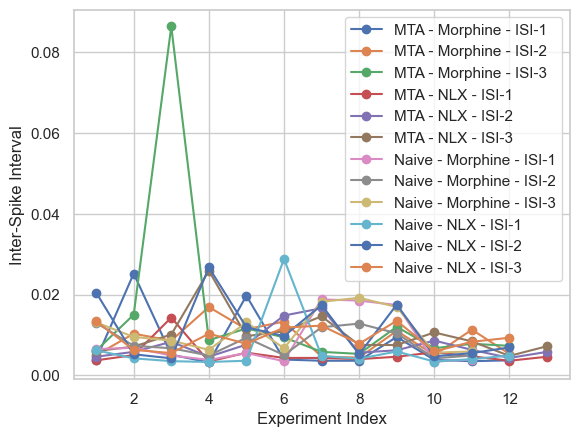

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Data/output/analysis_results.csv')

# Assuming 'Inter-Spike Intervals' is a column in your DataFrame
df['Inter-Spike Intervals'] = df['Inter-Spike Intervals'].apply(
    lambda x: np.fromstring(x.strip('[]'), sep=' ').astype(float) if isinstance(x, str) else np.nan
)

# Group by 'Parent Folder' and 'Subfolder'
grouped_df = df.groupby(['Parent Folder', 'Subfolder'])

# Create a figure and axis
fig, ax = plt.subplots()

# Iterate through groups and plot the first three ISI
for (parent_folder, subfolder), group_df in grouped_df:
    max_isi_length = min(3, max(len(isi) for isi in group_df['Inter-Spike Intervals'] if isinstance(isi, np.ndarray)))
    
    for i in range(max_isi_length):
        isis = [isi[i] for isi in group_df['Inter-Spike Intervals'] if isinstance(isi, np.ndarray) and len(isi) > i]
        ax.plot(range(1, len(isis) + 1), isis, marker='o', label=f'{parent_folder} - {subfolder} - ISI-{i+1}')

# Set labels and legend
ax.set_xlabel('Experiment Index')
ax.set_ylabel('Inter-Spike Interval')
ax.legend()
plt.show()


In [16]:
import numpy as np
import pandas as pd

# Load your original DataFrame from the CSV file
df = pd.read_csv('Data/output/analysis_results.csv')

# Group by 'Parent Folder' and 'Subfolder'
grouped_df = df.groupby(['Parent Folder', 'Subfolder'])

# Define the maximum number of ISI indices
max_isi_indices = 10  # You can adjust this based on your data

# Create an empty DataFrame to store results
results_df = pd.DataFrame()

# Iterate through groups and calculate average ISI for each ISI index
for (parent_folder, subfolder), group_df in grouped_df:
    # Extract ISI values from the group
    isi_values = [np.fromstring(isi.strip('[]'), sep=' ').astype(float) for isi in group_df['Inter-Spike Intervals'].values if isi]
    
    # Calculate average ISI for each ISI index
    avg_isis = [np.nanmean([isi[i] for isi in isi_values if len(isi) > i]) for i in range(max_isi_indices)]
    
    # Create a label for the group
    group_label = f'{parent_folder} - {subfolder}'

    # Add the label as a new column in the results DataFrame
    results_df[group_label] = avg_isis

# Export the results DataFrame to a new CSV file
results_df.to_csv('average_isis_results.csv', index=False)

# Print a message indicating where the new file is saved
print("Results saved to: average_isis_results.csv")


Results saved to: average_isis_results.csv


ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

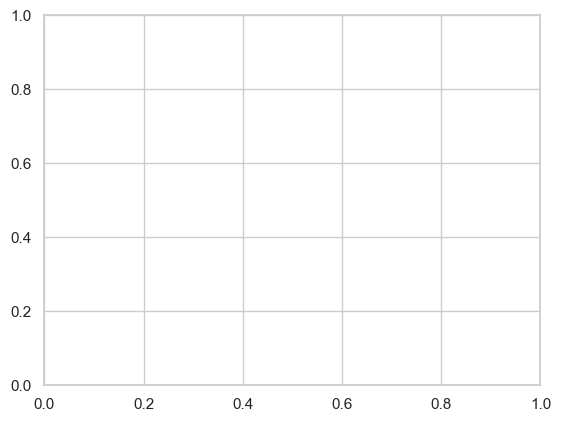

In [86]:
# Convert to a NumPy array of floats
isi_array = np.fromstring(isi_string.strip('[]'), sep=' ')

In [79]:
# Find the minimum length between normalized_time and avg_isi
min_length = min(len(normalized_time), len(avg_isi))

# Plot average ISI
ax.plot(normalized_time[:min_length], avg_isi[:min_length], label='Average', linewidth=2)

# Set labels and legend
ax.set_xlabel('Time')
ax.set_ylabel('Inter-Spike Interval')
ax.legend()
plt.show()

TypeError: object of type 'numpy.float64' has no len()

In [69]:
# Plot average ISI
average_isi = np.mean(np.vstack(isis), axis=0)
ax.plot(normalized_time, average_isi, label=f'{parent_folder} - {subfolder}')

max_length = max(len(isi) for isi in isis)
padded_isis = [np.pad(isi, (0, max_length - len(isi)), constant_values=np.nan) for isi in isis]
average_isi = np.nanmean(np.vstack(padded_isis), axis=0)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 16 and the array at index 1 has size 7

In [2]:
test1 = Test['c005_Analog_Input__0\x00\x00t\x00']
time = test['c001_Time\x00\x00\x00PÃ\x00\x00']
test1 = np.squeeze(test1)
time = np.squeeze(time)


start_index = 1
end_index = 1.2

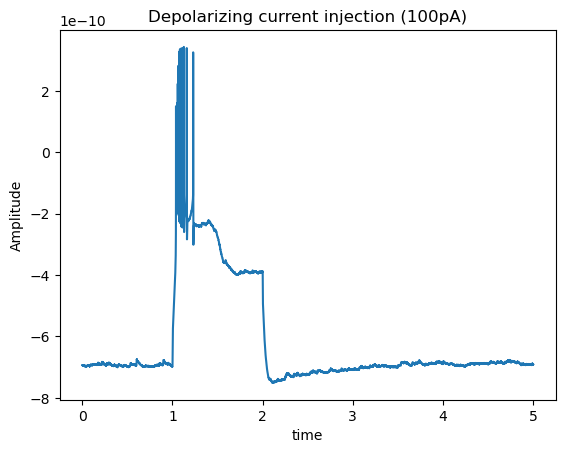

In [27]:
plt.plot(time, Depo_pA)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Depolarizing current injection (100pA)')
#plt.xlim(start_index, end_index)
plt.show()




In [5]:
##other shit## 

# Specify the time point you're interested in
target_time = 0.8

# Find the index in c001 corresponding to the target time
index_c001 = np.argmin(np.abs(time_array_c001 - target_time))

# Use the index to get the corresponding data point in c005
data_point_c005 = data_array_c005[index_c001]

NameError: name 'time_array_c001' is not defined

In [4]:
##average baseline##

# Define the time points
BL_start = 8000
BL_end = 10000


# Extract values between 0.8 seconds and 1 second  
BL_v = test1[BL_start:BL_end]

# Calculate the average of the baseline values
BL = np.mean(BL_v)
BL

-6.872128971221045e-10

In [5]:
Zeroed_test= test1 - BL

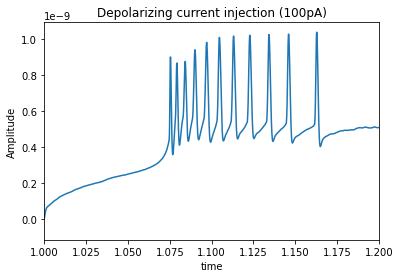

In [6]:
plt.plot(time, Zeroed_test)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Depolarizing current injection (100pA)')
plt.xlim(start_index, end_index)
plt.show()


In [ ]:
#find the number of events/APs# 
 #define range to compute
   # define threshold 
    #ask how many times it goes over said threshold. 
    
   # turn that into a frequency 
    
#ASK when do these cells inactivate follwing depolatization??#   ***help 
    
    
#Find the ISI 
 #plot the ISI from the initial AP
    
   # find the average refactory point following an AP
    
   # take that from a lot of different files and then group them. 



In [3]:
conda install ipfx

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - ipfx

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.



  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [4]:
# Import the packages 
from ipfx.feature_extractor import (SpikeFeatureExtractor,
                                    SpikeTrainFeatureExtractor)
import pyabf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'ipfx'

In [ ]:
abf = pyabf.ABF(test1)

print (abf)
abf.shape

In [ ]:
# Set the table from the dataframe below
dataframe = [] 
 
# Loop function to analyze each voltage trace of the file
for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber)
    time = abf.sweepX
    voltage = abf.sweepY
    current = abf.sweepC
     
    # Define the region (in seconds)
    start, end = 0.24, 0.265
     
    # Parameters for analysis: 
    sfx = SpikeFeatureExtractor (start, end, 
                                 filter=None, # cutoff frequency for 4-pole low-pass Bessel filter in kHz 
                                 dv_cutoff=20.0,  # minimum dV/dt to qualify as a spike in V/s 
                                 thresh_frac=0.05,  # fraction of average upstroke for threshold calculation
                                 min_peak=0)  # minimum acceptable absolute peak level in mV 
    sfx_results = sfx.process(time, voltage, current)
    dataframe.append(sfx_results)  # To get the mean: df.append(sfx_results.mean())
     
# Table with the features from all the action potentials
table = pd.concat(dataframe)
 
# Optional: Plot the trace/s
plt.figure(figsize=(6,4))
plt.xlabel ("Time (s)")
plt.ylabel("Voltage (mV)")
for sweepNumber in abf.sweepList:  # Loop to plot all the traces
    abf.setSweep(sweepNumber)
    plt.plot(abf.sweepX, abf.sweepY, alpha=.6, label="sweep %d" % (sweepNumber))
# To highllight one trace
abf.setSweep(3) 
plt.plot(abf.sweepX, abf.sweepY, linewidth=1, color='black')
plt.xlim(0.24, 0.265)
    
# Display the graph and the table
plt.show()
table
 
# Remove the below # to show only selected columns. E.g:
# columns = ['threshold_i', 'threshold_v', 'width', 'upstroke', 'downstroke']
# table[columns]